# EDA palmer penguins 

Análisis exploratorio de datos del data set `palmer penguins` como proyecto del curso ["Análisis exploratorio de datos"](https://platzi.com/cursos/analisis-exploratorio-datos/).

![penguins](./imgs/penguins.png)

Configuración inicial para recargar los modulos propios del proyecto:

In [117]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
import sys
sys.path.append("..")

import eda_penguins_modules.utils.paths as path

Librerias:

In [119]:
import empiricaldist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

## Apariencia general de los graficos

In [120]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Preview y carga del data set

In [121]:
input_file = path.data_processed_dir("preprocessed_palmerpenguins.csv")
penguins_df = pd.read_csv(input_file)
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [122]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


### Glosario de variables
El dataset consta de 8 variables, aquí una breve descripción del significado de cada varibale:
- `species`: Nombre de la especie del pingüino (Chinstrap, Adélie, or Gentoo).
- `island`: Nombre de la isla.
- `bill_length_mm`: Largo del pico en milimetros.
- `bill_depth_mm`: Profundidad/ancho del pico en milimetros.
- `flipper_length_mm`: Largo de la aleta en milimetros.
- `body_mass_g`: Masa corporal en gramos.
- `sex`: Sexo del pingüino (Male/Female).
- `year`: Año en que se tomó la muestra.

<div align="center">
  <img src="./imgs/bill_depth.png" alt="Bill/Culmen characteristics" width="500" heigh="500">
</div>

## Validación de datos

**¿Qué tipo de datos son las variables del dataset?**

In [123]:
penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

**¿Cuántas variables de cada tipo de datos tenemos en el dataset?**

In [124]:
(
  penguins_df
  .dtypes
  .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

**¿Cuantas variables y observaciones tenemos?**

In [125]:
rows, columns = penguins_df.shape
print(f"Observaciones: {rows}")
print(f"variables: {columns}")

Observaciones: 344
variables: 8


**¿Existen valores nulos explícitos?**

In [126]:
(
  penguins_df
  .isnull()
  .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

**De tener observaciones con valores nulos, ¿cuántos tenemos por cada variable?** 

In [127]:
(
  penguins_df
  .isnull()
  .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

**¿Cuántos valores nulos hay en total en el dataset?**

In [128]:
(
  penguins_df
  .isnull()
  .sum()
  .sum()
)

19

**¿Cuál es la proporción de los valores nulos por cada variable?**

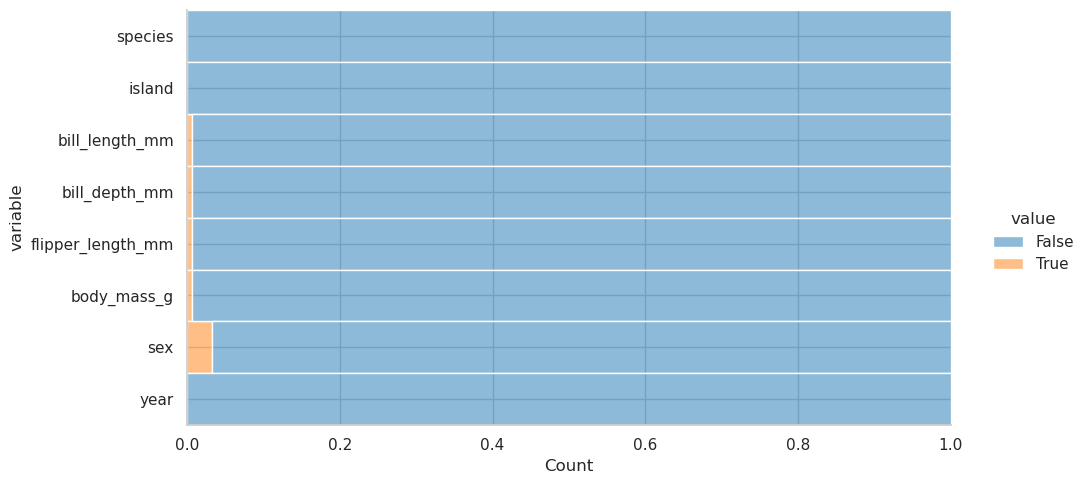

In [129]:
(
  penguins_df
  .isnull()
  .melt()
  .pipe(
    lambda df: (
      sns.displot(
        data=df,
        y='variable',
        hue='value',
        multiple='fill',
        aspect=2,
        alpha=0.5
      )
    )
  )
)
plt.show()

**Visualizando valores nulos en todo el dataset**

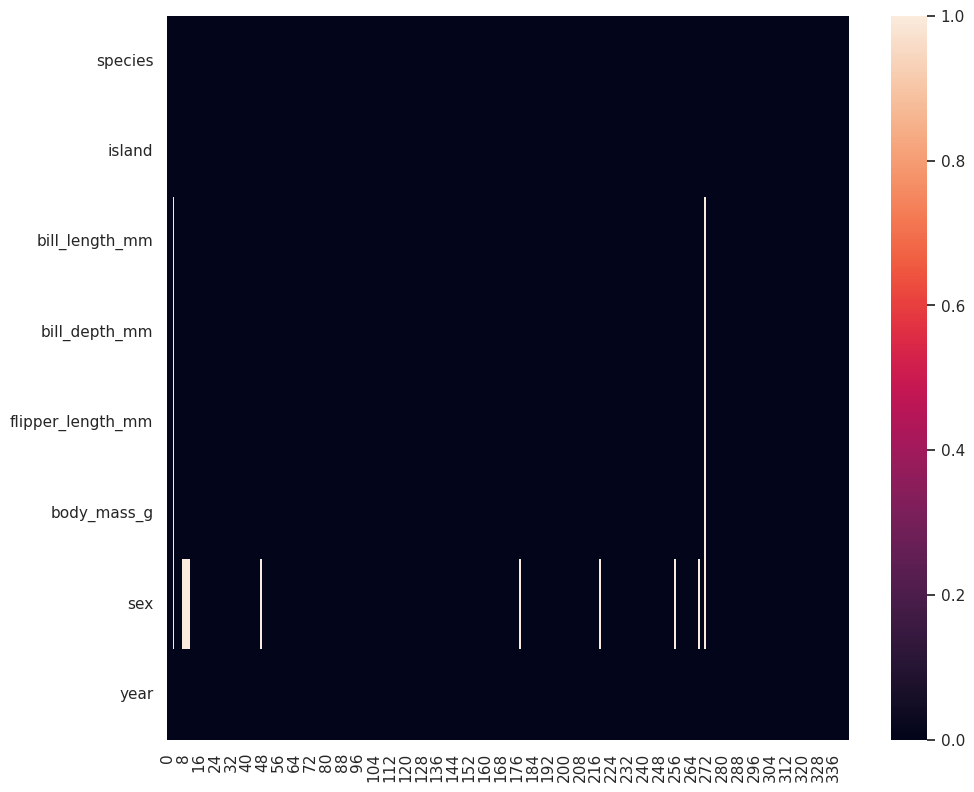

In [130]:
(
  penguins_df
  .isnull()
  .transpose()
  .pipe(
    lambda df: (
      sns.heatmap(data=df)
    )
  )
)
plt.show()

In [131]:
penguins_df.loc[271]

species              Gentoo
island               Biscoe
bill_length_mm          NaN
bill_depth_mm           NaN
flipper_length_mm       NaN
body_mass_g             NaN
sex                     NaN
year                   2009
Name: 271, dtype: object

**¿Cuántas observaciones perdemos si eliminamos los datos faltantes?**

In [132]:
penguins_df.shape

(344, 8)

In [133]:
processed_penguins_df = penguins_df.dropna()
processed_penguins_df.shape

(333, 8)

Eliminamos la variable `year`

In [134]:
processed_penguins_df.drop('year', axis=1, inplace=True)
processed_penguins_df.head()

/home/pahoalapizco/anaconda3/envs/eda_penguins/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


## Conteos y proporciones

### Preludio: ¿Qué estadisticos describen mejor el dataset?

**Todas las variables**

In [135]:
processed_penguins_df.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


**Numéricas**

In [136]:
processed_penguins_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


**Categóricas (1)**

In [137]:
# Visualizar los conteos y frecuencias de variables categóricas que por defualt son de tipo "object"
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


**Categóricas  (2)**

In [138]:
# Casteo de tipo de object a category, con el fin de identificar exlusivamente aquellas variables
# que son realmente categoricas.
(
  processed_penguins_df
  .astype({
    "species": "category",
    "island": "category",
    "sex": "category"
  })
  .describe(include="category")
)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Visulización de los conteos

**Pandas**

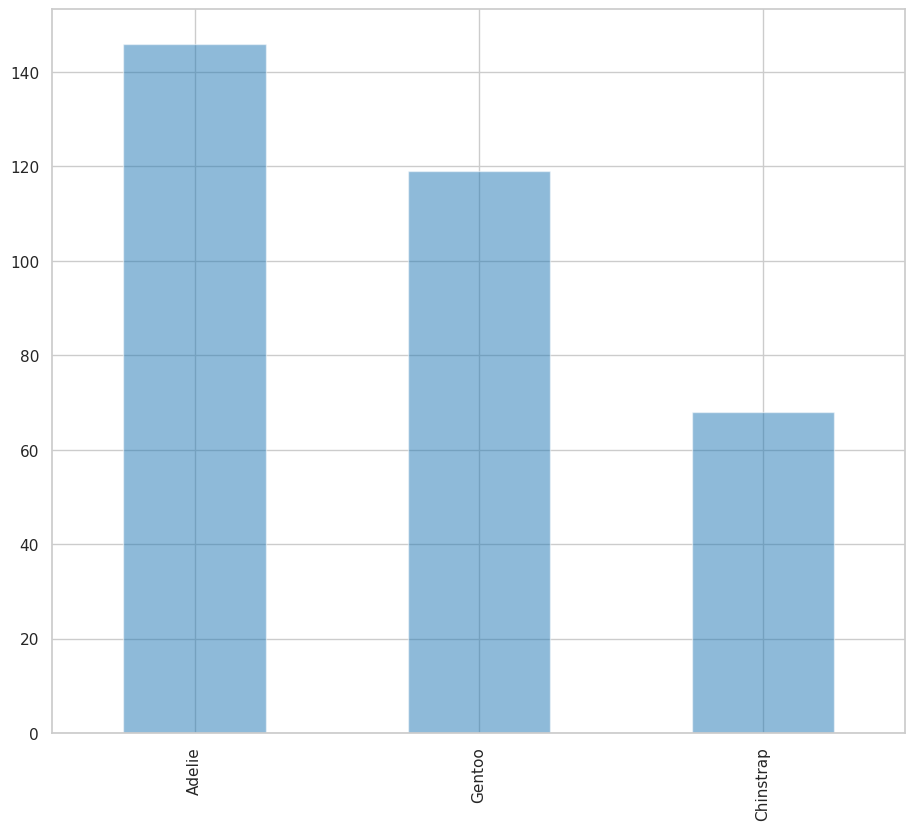

In [139]:
(
  processed_penguins_df
  .species
  .value_counts()
  .plot(
    kind="bar",
    alpha=0.5
  )
)
plt.show()

**Seaborn**

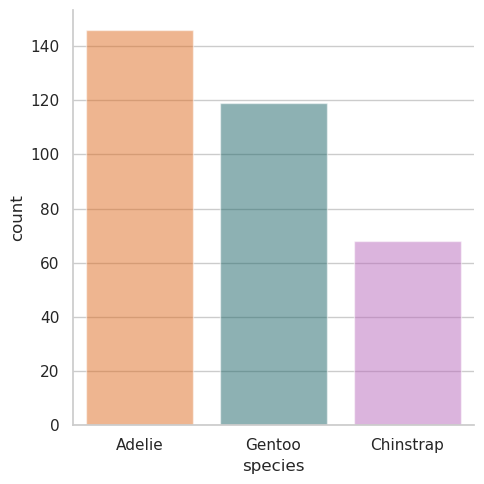

In [140]:
sns.catplot(
  data=processed_penguins_df,
  x="species",
  kind="count",
  palette=penguin_color,
  alpha=0.5
)
plt.show()

2da forma haciendo un conteo "manual"

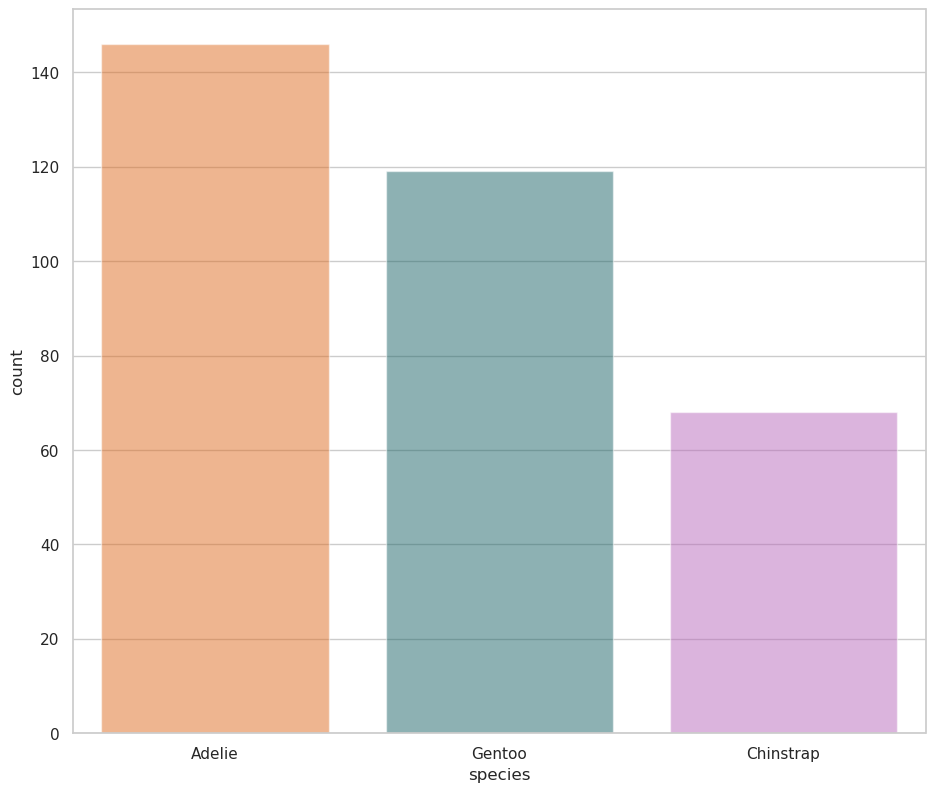

In [141]:
(
  processed_penguins_df
  .value_counts("species", sort=True)
  .reset_index(name="count")
  .pipe(
    lambda df: (
      sns.barplot(
        data=df,
        x="species",
        y="count",
        palette=penguin_color,
        alpha=0.5
      )
    )
  )
)
plt.show()

Conteos de las variables categóricas

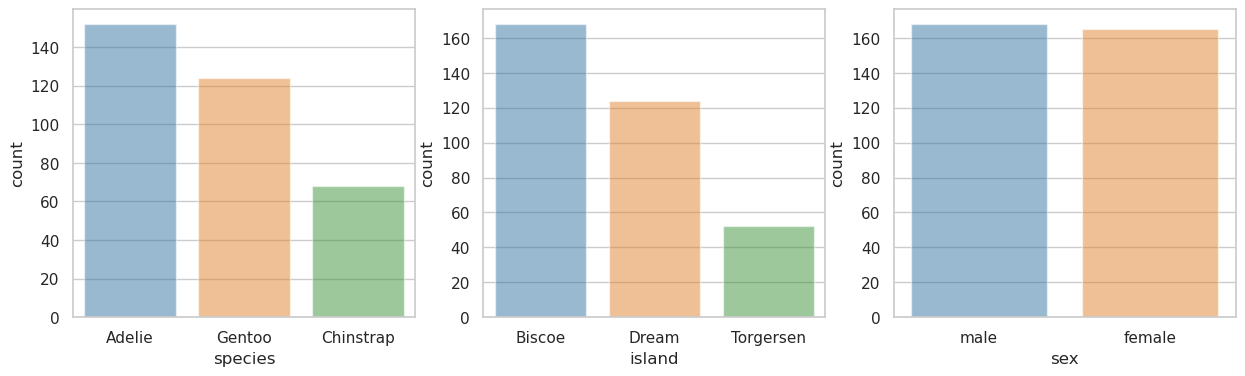

In [142]:
categories = processed_penguins_df.select_dtypes(include=object).columns

# Visualizar los conteos de todas las variables cateogóricas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
for idx in range(len(categories)):
  (
    penguins_df
    .value_counts(categories[idx], sort=True)
    .reset_index(name="count")
    .pipe(
      lambda df: (
        sns.barplot(
          data=df,
          x=categories[idx],
          y="count",
          ax=axes[idx],
          alpha=0.5
        )
      )
    )
  )

### Visulización los proporciones

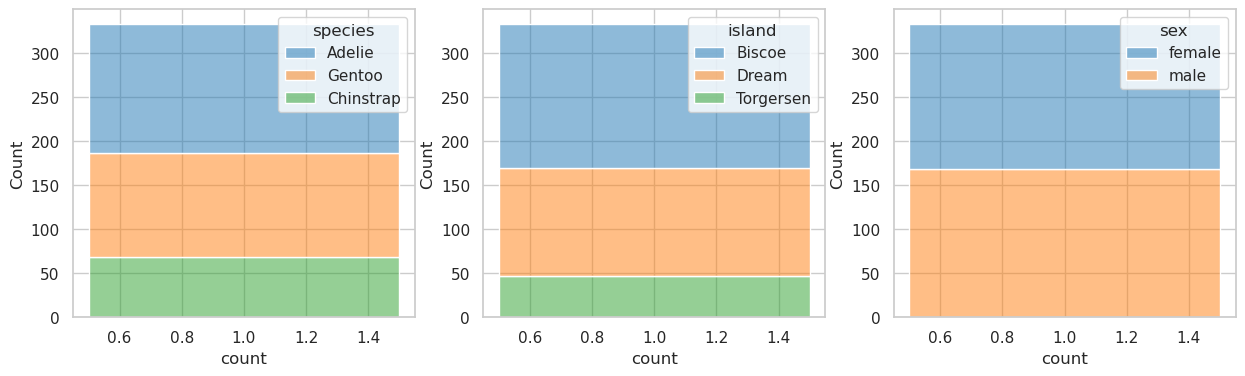

In [143]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

for i in range(len(categories)):
  (
    processed_penguins_df
    .value_counts()
    .reset_index(name="count")
    .pipe(
      lambda df: (
        sns.histplot(
          data=df,
          x="count",
          hue=categories[i],
          multiple="stack",
          ax=axes[i],
          alpha=0.5
        )
      )
    )
  )

## Medidas de tendencia central

**Media**

In [144]:
processed_penguins_df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

**Mediana**

In [145]:
processed_penguins_df.median(numeric_only=True)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

**Moda**

In [146]:
processed_penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male


## Medidas de dispersión

### Rango de las variables

**Máximos**

In [147]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64

**Mínimos**

In [148]:
processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: float64

**Rangos**

In [149]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64

### Desviación estándar

In [150]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
dtype: float64

### Rango intercuartílico

**Q1** o Primer cuartíl

In [151]:
processed_penguins_df.quantile(0.25)

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
Name: 0.25, dtype: float64

**Q2** o Segundo cuartíl = Mediana

In [152]:
processed_penguins_df.quantile(0.5)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
Name: 0.5, dtype: float64

**Q3** o Tercer cuartíl

In [153]:
processed_penguins_df.quantile(0.75)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
Name: 0.75, dtype: float64

**Rango intercuartilico** `Q3 - Q1`

In [154]:
processed_penguins_df.quantile(0.75) - processed_penguins_df.quantile(0.25)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
dtype: float64

In [155]:
(
  processed_penguins_df
  .quantile(q=[0.25, 0.5, 0.75])
  .transpose()
  .rename_axis("variable")
  .reset_index()
  .assign(
    iqr=lambda df: df[0.75] - df[0.25]
  )
)

,variable,0.25,0.5,0.75,iqr
0,bill_length_mm,39.5,44.5,48.6,9.1
1,bill_depth_mm,15.6,17.3,18.7,3.1
2,flipper_length_mm,190.0,197.0,213.0,23.0
3,body_mass_g,3550.0,4050.0,4775.0,1225.0


## Visualización de la distribución de las variables

In [156]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
  """Find optimal bandwidth using Freedman Diaconis rule."""
  IQR = x.quantile(0.75) - x.quantile(0.25)
  N = x.size

  return 2 * IQR / N**(1/3)

**Histograma**

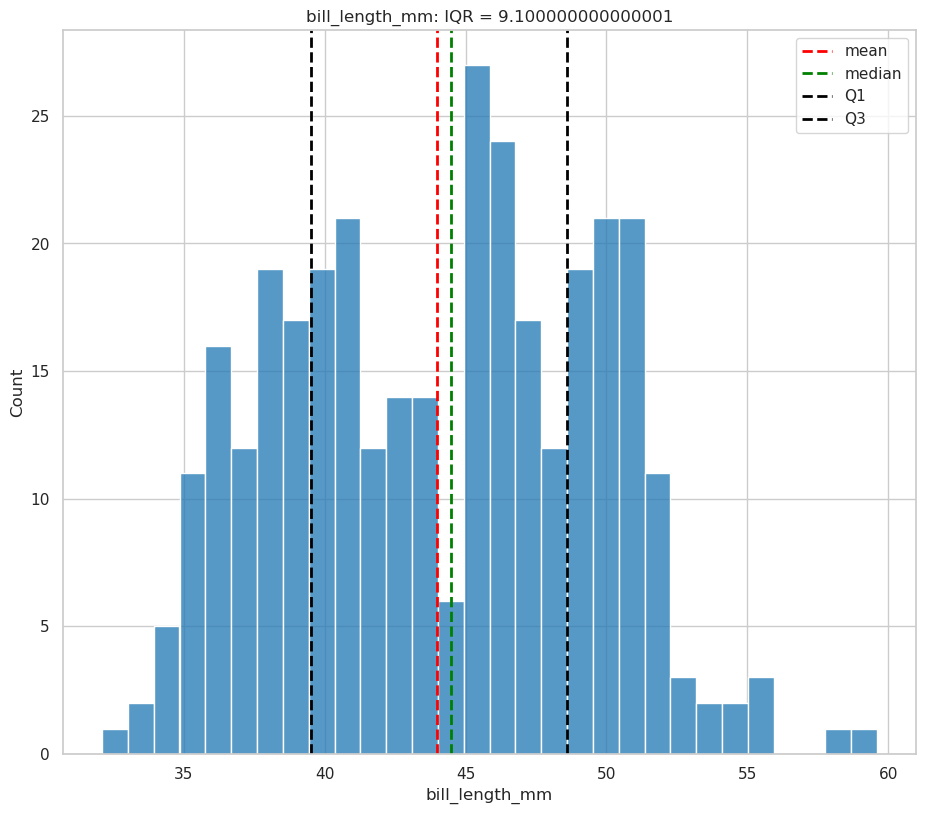

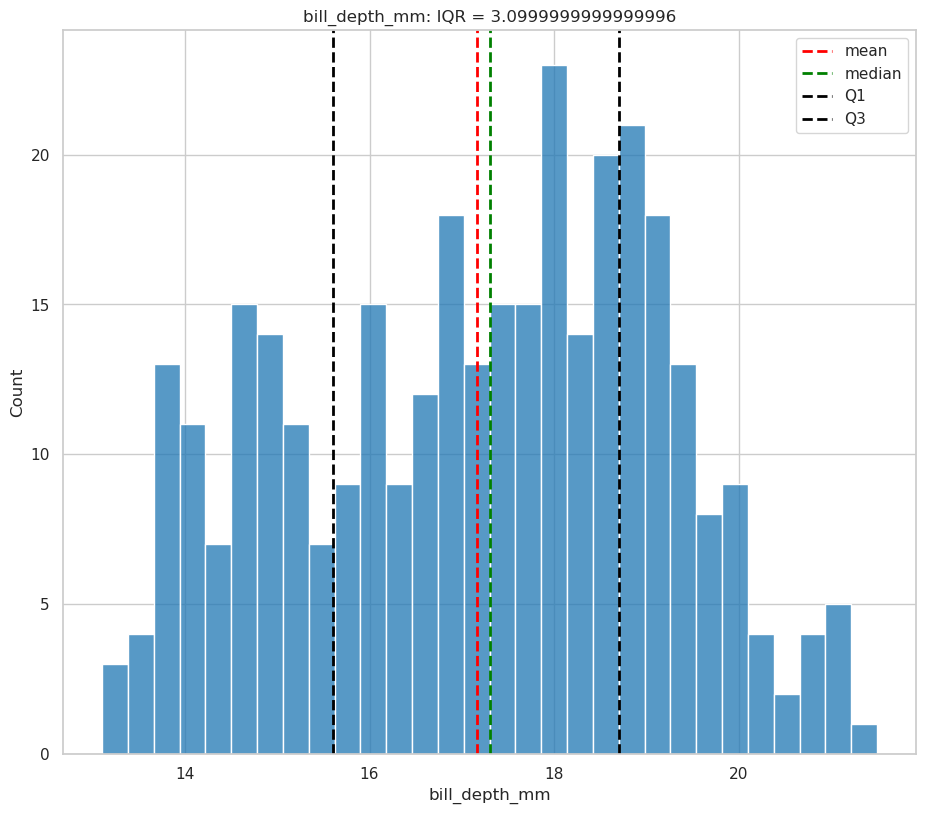

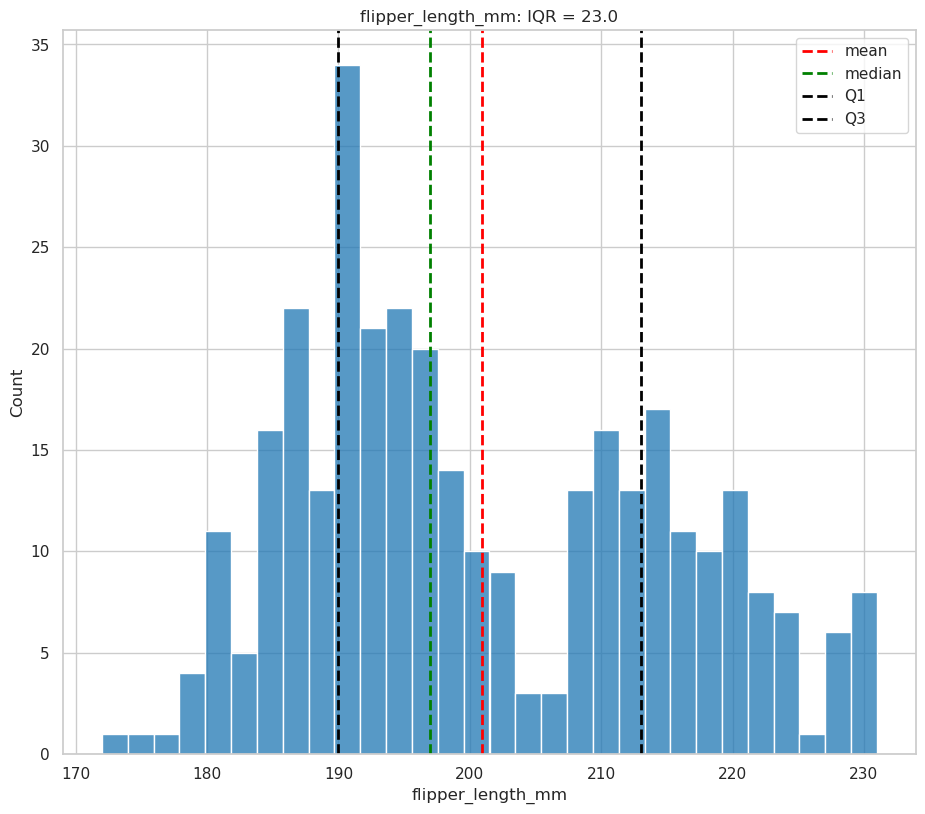

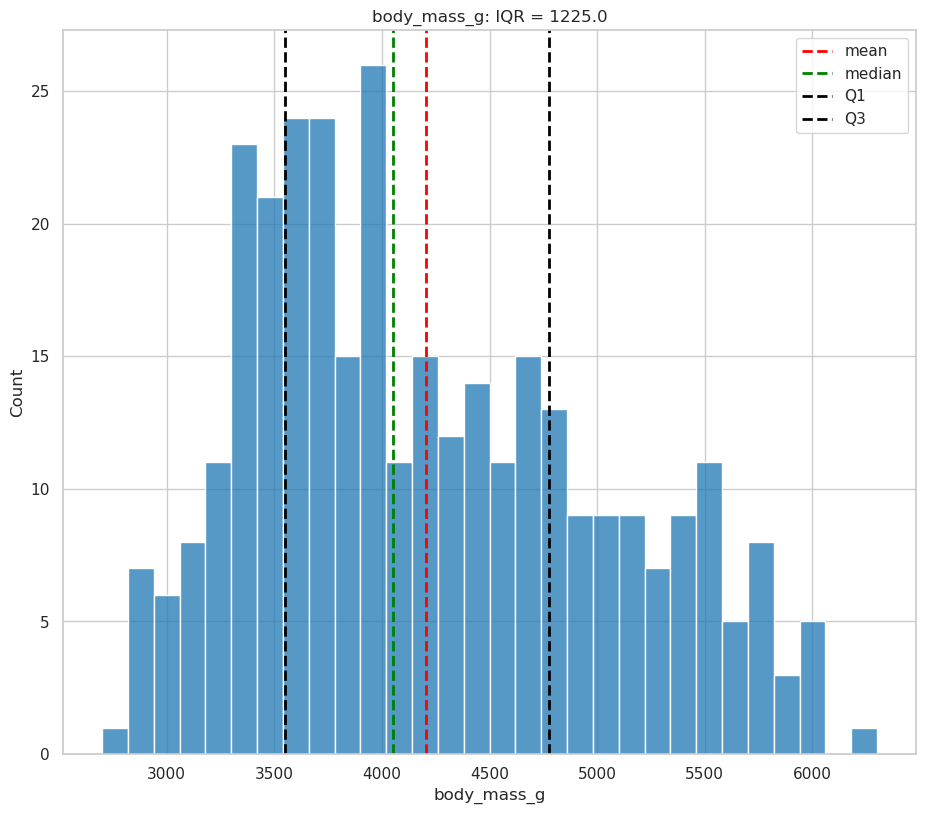

In [160]:
variables_arr = processed_penguins_df.describe(include=np.number).columns

for i in range(len(variables_arr)):
  var = variables_arr[i]

  sns.histplot(
    data=processed_penguins_df,
    x=var,
    bins=30,
    # binwidth=freedman_diaconis_bindwidth(processed_penguins_df[var])
  )
  
  q1 = processed_penguins_df[var].quantile(0.25)
  q3 = processed_penguins_df[var].quantile(0.75)
  iqr = q3 - q1
  mean = processed_penguins_df[var].mean()
  median = processed_penguins_df[var].median()

  plt.axvline(x=mean, color="red", linestyle="--", linewidth=2, label="mean")
  plt.axvline(x=median, color="green", linestyle="--", linewidth=2, label="median")
  plt.axvline(x=q1, color="black", linestyle="--", linewidth=2, label="Q1")
  plt.axvline(x=q3, color="black", linestyle="--", linewidth=2, label="Q3")
  
  plt.legend()
  plt.title(f"{var}: IQR = {iqr}")

  plt.show()

**Diagrama de cajas/boxplot**

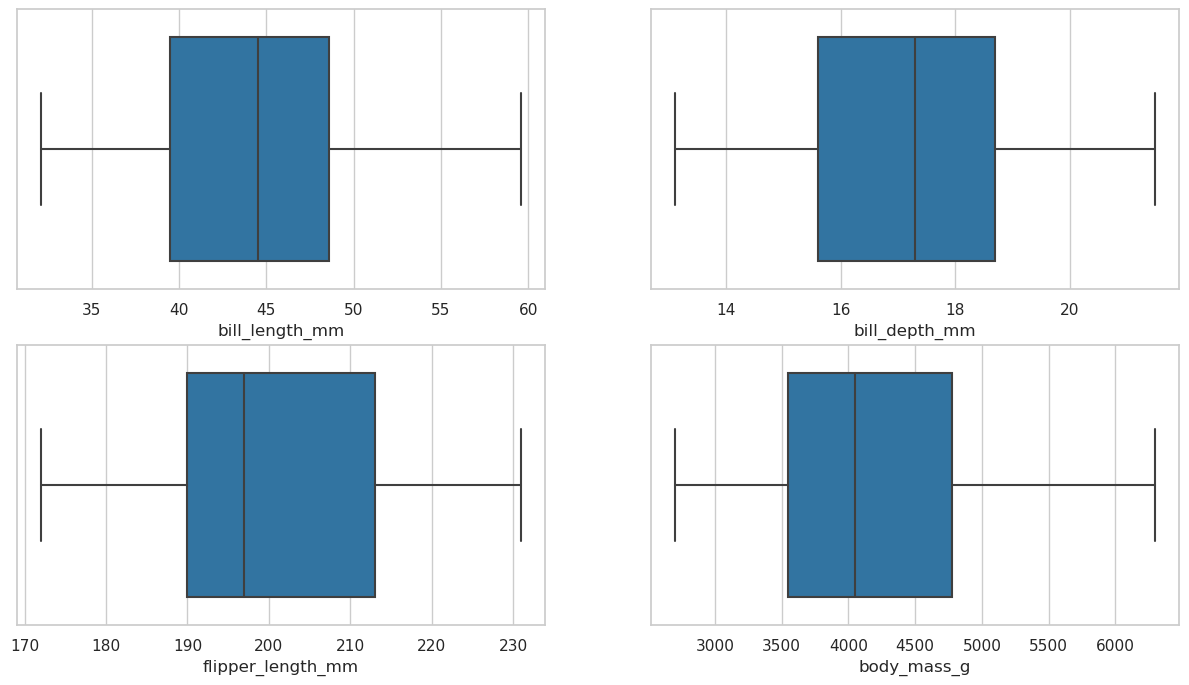

In [169]:
variables_arr = processed_penguins_df.describe(include=np.number).columns

fig, axes = plt.subplots(nrows= 2, ncols=2, figsize=(15,8))

r, c = 0, 0

for i in range(len(variables_arr)):
  var = variables_arr[i]

  sns.boxplot(
    data=processed_penguins_df,
    x=var,
    ax=axes[r][c]
  )

  c +=1
  if c > 1:
    r += 1
    c = 0
